# TVA

In [2]:
import warnings

warnings.filterwarnings("ignore")

from src import utils
from src.outcomes import plurality_outcome
from src.happiness_level import HappinessLevel
from src.strategic_voting_risk import StrategicVoting
from src.Coalition_Compromising import find_stable_coalitions_by_compromising
import os
import numpy as np 
import pandas as pd

In [3]:
path_voting = "input/voting_result.json"
if "env" in os.environ:
    if os.environ["env"] == "docker":
        path_voting = "/input/voting_result.json"

This is the voting input

In [4]:
voting = utils.read_voting(path_voting, table_name="voting5")
voting_table = voting.to_pandas()
voting_table

,voter_0,voter_1,voter_2,voter_3,voter_4,voter_5
preference_0,C,B,C,C,B,A
preference_1,A,D,D,D,A,D
preference_2,D,C,A,B,D,B
preference_3,B,A,B,A,C,C


(7, 200)
None


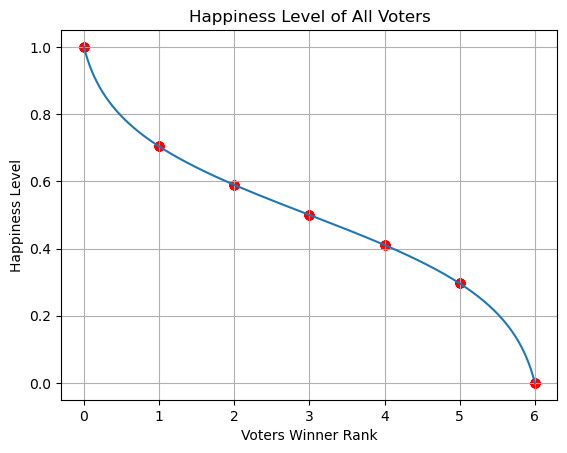

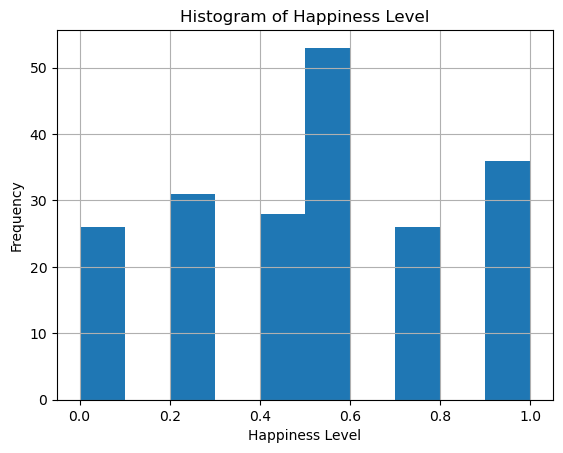

In [5]:
n_cand = 7
random_voting = utils.random_voting(200, n_cand)
print(random_voting.shape)
result_random = plurality_outcome(random_voting)
hlevel = HappinessLevel(random_voting, result_random.winner)
print(hlevel._all_happiness_level)
hlevel.plot()
hlevel.histogram()

## Strategic Voting

In [6]:
voting.to_pandas()

,voter_0,voter_1,voter_2,voter_3,voter_4,voter_5
preference_0,C,B,C,C,B,A
preference_1,A,D,D,D,A,D
preference_2,D,C,A,B,D,B
preference_3,B,A,B,A,C,C


In [7]:
result = plurality_outcome(voting)
result

Winner: C
{'A': 1, 'B': 2, 'C': 3, 'D': 0}

Note that **voter 5** is the only voter that can engage in strategic voting. Voter 5 prefers $B$ over the winner $C$. Hence, they can increase their $\text{Happiness Level}$ by placing $B$ as their first preference, resulting in a tie between $C$ and $B$ in the voting outcome (for plurality, voting for two, Borda). Since ties are resolved in alphabetical order, $B$ wins over $C$.

The table below displays the two voting strategies available to voter 5.

In [8]:
happiness_level = HappinessLevel(voting, result.winner)
strategic_voting = StrategicVoting(voting).run(happiness_level, plurality_outcome)

strategic_voting.all

,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,5,"[B, A, D, C]",B,0.410487,0.0,2.820973,3.410487
1,5,"[B, D, A, C]",B,0.410487,0.0,2.820973,3.410487


The table displays the best strategic voting for each voter

In [9]:
strategic_voting.best

,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,5,"[B, A, D, C]",B,0.410487,0.0,2.820973,3.410487


Strategic Voting Risk

In [10]:
strategic_voting.risk

0.13682886358890622

# ADVANCED TVA Using Clustering + Compromising
The idea is to use Clustering plus Compromising. We try to find the stable coalitions that garantee an increase of happiness for all their partecipants

In [11]:
voting_df= pd.DataFrame(random_voting).T
print(random_voting.shape)
print(voting_df.shape)
print(hlevel._all_happiness_level.shape)
print(find_stable_coalitions_by_compromising(10, voting_df, hlevel, result_random))

(7, 200)
(200, 7)
(200,)
     0  1  2  3  4  5  6         H
0    F  C  B  A  E  G  D  0.296110
1    C  F  G  B  A  E  D  0.589513
2    E  B  C  A  G  D  F  0.410487
3    E  B  D  A  C  F  G  0.000000
4    F  E  D  G  A  B  C  0.500000
..  .. .. .. .. .. .. ..       ...
195  F  B  E  A  D  C  G  0.000000
196  G  F  E  A  C  D  B  1.000000
197  B  F  G  E  C  D  A  0.589513
198  A  F  E  G  D  B  C  0.500000
199  E  D  F  C  A  B  G  0.000000

[200 rows x 8 columns]
7
Burying B made everyone in the group 5 happier, here the new winner:   Winner: B
{'A': 24, 'B': 40, 'C': 21, 'D': 30, 'E': 22, 'F': 25, 'G': 36}
7
Burying A made everyone in the group 5 happier, here the new winner:   Winner: A
{'A': 36, 'B': 28, 'C': 21, 'D': 30, 'E': 22, 'F': 25, 'G': 36}
7
Burying B made everyone in the group 5 happier, here the new winner:   Winner: B
{'A': 24, 'B': 40, 'C': 21, 'D': 30, 'E': 22, 'F': 25, 'G': 36}
7
Burying A made everyone in the group 5 happier, here the new winner:   Winner: A
{'A': 3